## Objective

Build a statiscal model to understand what variables influence the Apparent Temperature of a weather observation dataset.

In [16]:
# Improting packages and libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [20]:
# reading & previewing data
df = pd.read_csv("weatherHistory.csv", header=0) # header 0 means telling dataset has header and it is in the first (0th) line
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Exploring the relationships amongst numerical variables

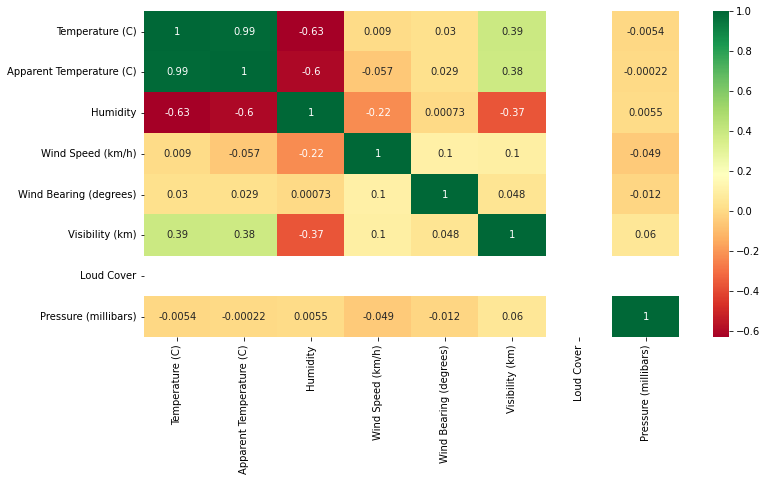

In [10]:
# plotting the correlation amongst independent and dependent variables in graph
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

### Exploring the categorical variable

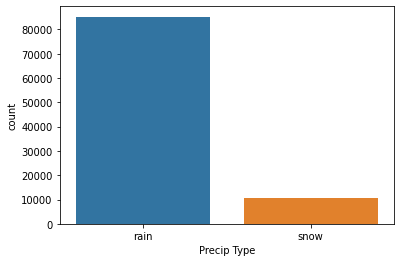

In [5]:
sns.countplot(x='Precip Type',data=df)

### Observation: 
As majority of the precip type data is skewed towards rain. Exploring the statistical regression model without this variable first.

# Linear Regression

Using Statsmodel Library

 ### Declaring the dependent and the independent variables

In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
x = df[['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]
y = df['Apparent Temperature (C)']

In [11]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.435
Model:                                  OLS   Adj. R-squared:                  0.435
Method:                       Least Squares   F-statistic:                 1.484e+04
Date:                      Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                              14:38:53   Log-Likelihood:            -3.3793e+05
No. Observations:                     96453   AIC:                         6.759e+05
Df Residuals:                         96447   BIC:                         6.759e+05
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observation: 
As the model has only explained around 43% variations, employing backward elimination process and rebuilding the model by removing the variables which either do not significantly influence the dependent variable or have lowest coefficients.

In [12]:
x = df[['Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]
y = df['Apparent Temperature (C)']

In [13]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.433
Model:                                  OLS   Adj. R-squared:                  0.433
Method:                       Least Squares   F-statistic:                 2.452e+04
Date:                      Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                              14:40:59   Log-Likelihood:            -3.3811e+05
No. Observations:                     96453   AIC:                         6.762e+05
Df Residuals:                         96449   BIC:                         6.763e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observation:

Even after rebuilding the model with lesser features the performance has not seen improvements. Therefore proceeding to convert the categorical variable into numerical one.

## Dummy Variable Creation
- This is done to convert categorical values into numerical/boolean values for model building.

## Note: Avoid the Dummy Variable Trap
- Always remember to avoid the dummy variable trap. The way to do that is N-1.
- While creating dummy variables off of the categorical variable, always reduce the number of values by 1.

In [21]:
# deleting the unnecessary dummy variables
del df['Formatted Date']
del df['Summary']
del df['Daily Summary']

In [23]:
# creating dummy variables for all the categorical variables in the dataset
df = pd.get_dummies(df)

In [24]:
# testing the operations
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1,0


In [25]:
# deleting the unnecessary dummy variables
del df['Precip Type_snow']

In [26]:
# testing the operations
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1


# Linear Regression

Using Statsmodel Library

 ### Declaring the dependent and the independent variables

In [27]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Precip Type_rain'],
      dtype='object')

In [28]:
x = df[['Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Precip Type_rain']]
y = df['Apparent Temperature (C)']

In [29]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.594
Model:                                  OLS   Adj. R-squared:                  0.594
Method:                       Least Squares   F-statistic:                 2.354e+04
Date:                      Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                              21:29:59   Log-Likelihood:            -3.2195e+05
No. Observations:                     96453   AIC:                         6.439e+05
Df Residuals:                         96446   BIC:                         6.440e+05
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### Observation: 
Significant improvement in the new model performance is observed, as the model has now explained around 60% variations, employing backward elimination process to finetune the model to see if the accuracy can be improved further.

 ### Declaring the dependent and the independent variables

In [30]:
x = df[['Humidity',
       'Wind Speed (km/h)', 'Visibility (km)',
       'Loud Cover', 'Precip Type_rain']]
y = df['Apparent Temperature (C)']

In [31]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.593
Model:                                  OLS   Adj. R-squared:                  0.593
Method:                       Least Squares   F-statistic:                 3.517e+04
Date:                      Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                              21:37:50   Log-Likelihood:            -3.2206e+05
No. Observations:                     96453   AIC:                         6.441e+05
Df Residuals:                         96448   BIC:                         6.442e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\soumyadip.chatterjee\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### Observation: 
Performance is seen to deteriorate in this new model. Therefore it is safely concluded that the previous model provides the best possible prediction accuracy. 